<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span></li><li><span><a href="#Построение-модели-прогнозирования-оттока-клиентов" data-toc-modified-id="Построение-модели-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение модели прогнозирования оттока клиентов</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Сегментация-клиентов" data-toc-modified-id="Сегментация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Сегментация клиентов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Исследование оттока клиентов для регионального банка

Эффективное взаимодействие с клиентами основа успеха любого клиентоориентированного бизнеса. Региональный банк моделирует стратегию взаимодействия с клиентами на основе аналитических данных. Изучается портрет клиента, а также признаки, влияющие на отток.

Банк располагается в Ярославле и в областных городах: Ростов Великий и Рыбинск.

Исследование покажет как клиенты пользуютя услугами, а также поможет составить портрет клиентов, которые склонны уходить из банка.

По итогам исследования подготовим презентацию, чтобы отразить основные выводы, которые помогут менеджерам банка увидеть ясную картину и разработать необходимые продукты направленыые на удержание клиентов.

Создадим дашборд, который будет в себе содержать:

 - диаграмму, отражающая количество клиентов, в зависимости от числа используемых продуктов.
 - индикатор процента ушедших клиентов
 - фильтр дашборда по городу

**Цель работы**

 - сформировать прогноз вероятности оттока клиентов
 - выявить типичные группы клиентов и охарактеризовать их основные свойства
 - проанализировать основные признаки наиболее сильно влиящие на отток
 - предложить рекомендации по стратегии взаимодействия с пользователями и их удержания
 

Данные для анализа представлены в `csv`- файле

Таким образом исследование пройдет по следуюшим этапам:

 - изучение данных, получение общей информации
 - исследовательский анализ данных 
 - построение модели прогнозирования оттока клиентов
 - сегментация клиентов
 - общий вывод по итогу исследования и рекомендации

## Изучение данных из файла

In [1]:
import pandas as pd      # импортируем необходимые библиотеки
import numpy as np
import math as mth
# статистические тесты
from scipy import stats as st
from statsmodels.stats.proportion import proportions_ztest
# графики
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


#ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score

from sklearn import tree



Прочитаем файл и сохраним

Получим общюю информацию

In [2]:
path = "https://drive.google.com/uc?export=download&id=1zBY_MIHwC9SKr7QO1ObJpp6pnCfpXuJv"

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
0,258835,838.0,Ростов,Ж,32,1,377652.29,2,0,1,105665.06,1
1,96660,845.0,Ростов,Ж,31,3,214980.98,5,0,1,62058.62,0
2,99838,869.0,Ростов,Ж,30,4,467040.46,2,1,1,156945.23,1
3,216099,856.0,Рыбинск,Ж,25,4,475727.88,4,0,1,19502.68,0
4,120240,873.0,Рыбинск,Ж,37,3,1350858.40,4,0,1,119804.41,0


In [5]:
df.tail()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
9995,186605,693.0,Рыбинск,М,42,0,NaN,2,1,1,221661.10,0
9996,204842,655.0,Ярославль,М,27,0,NaN,1,1,0,144948.73,0
9997,216640,828.0,Ярославль,Ж,44,2,168323.87,2,1,1,163995.10,0
9998,168786,883.0,Рыбинск,Ж,38,3,342099.90,2,1,0,80587.26,0
9999,128656,698.0,Ярославль,Ж,37,0,NaN,1,1,1,255439.00,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  salary         10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


 - *Изучим столбцы более детально*

In [7]:
print('Количество уникальных идентификаторов пользователей: {}'.format(df['userid'].nunique()))
print()
print('Количество строк в датасете: {}'.format(len(df)))

Количество уникальных идентификаторов пользователей: 10000

Количество строк в датасете: 10000


In [8]:
for column in['gender', 'city', 'equity', 'products']:
    print(df[column].value_counts())

М    5008
Ж    4992
Name: gender, dtype: int64
Ярославль    5906
Рыбинск      2663
Ростов       1431
Name: city, dtype: int64
0    2592
5    1918
4    1850
3    1543
2    1052
1     774
6     161
7      80
8      17
9      13
Name: equity, dtype: int64
2    7077
1    1894
3     524
4     474
5      30
0       1
Name: products, dtype: int64


Скорее всего у клиента банка не может быть 0 продуктов. Один все равно будет. Заменим значение

In [9]:
df['products'] = df['products'].replace(0, 1)

In [10]:
df['products'].value_counts()

2    7077
1    1895
3     524
4     474
5      30
Name: products, dtype: int64

Комментарий

 - исправили аномальные значения в столбце products
 - мужчин и женщин, примерно поровну
 - клиенты растределены по трем городам Ярославль, Рыбинск, Ростов
 - количество объектов в собстенности встречается от 0 до 9
 - большинство клиентов банка пользуются двумя продуктами банка

Количество строк в столбцах одинаковое за исключением  balance. Изучим столбец

In [11]:
df['balance'].describe()

count    7.705000e+03
mean     8.290247e+05
std      1.980313e+06
min      0.000000e+00
25%      2.965680e+05
50%      5.248943e+05
75%      9.811036e+05
max      1.191136e+08
Name: balance, dtype: float64

In [12]:
print('Количество пропусков: {}'.format(df['balance'].isna().sum()))
print()
print('Потеря составит: {:.0%}'.format(df['balance'].isna().sum() / len(df)))

Количество пропусков: 2295

Потеря составит: 23%


In [13]:
f"Доля оттока среди пропусков  {df[df['balance'].isna()].churn.mean():.1%}"

'Доля оттока среди пропусков  0.2%'

In [14]:
f"Доля кредиток среди пропусков: {df[df['balance'].isna()].credit_card.mean():.2%}"

'Доля кредиток среди пропусков: 99.61%'

Комментарий

Количество пропусков достаточно большое, чтобы просто удалить строки. Можно предположить, что на счете у клиента просто нет денег и при выгрузке данных нулевые значения заменились на пропуски. Возможно, на момент выгрузки происходило движение средств по счету

Сопоставив пропущенные значения и факт оттока клиента, мы увидели, что 0 на балансе не связан с оттоком.

Если мы определяем, что пропуски в столбце balance характерны для держателей кредитных карт очевидно, что основная цель взаимодействия с банком для таких клиентов - это получение кредита. Возможно деньги на балансе и появляются, но сразу же списываются в счет погашения долга. И как мы уже установили, что пропущеные значения в balance присутствуют в 98% случаев у оставшихся клиентов. Наличие кредитной карты повышает вероятность, что клиент не уйдет. 

Можем оставить пропуски без изменений. Не будем приписывать клиенту банка деньги, которых у него нет!

In [15]:
print('Количество дубликатов: {}'.format(df.duplicated().sum()))

Количество дубликатов: 0


In [16]:
print('Количество дубликатов без столбца userid: {}'.format(df.drop('userid', axis=1).duplicated().sum()))

Количество дубликатов без столбца userid: 0


**Вывод**

 - исправили аномальное значение в столбце products
 - количество строк в столбцах одинаковое за исключением  столбца balance. Оставили пропуски без изменений
 - дубликатов при проверке не выявили

## Исследовательский анализ данных (EDA)

 - Изучим средние значения  методом describe()
 
Для дальнейшего исследования заменим значения в столбце gender на значения 0 и 1

Удалим столбец userid. Мы уже проверили датасет на уникальност, в дальнейшей работе он нам не понадобится.

In [17]:
df['gender'] = df['gender'].replace(['М', 'Ж'], [1, 0])
df.gender.value_counts()

1    5008
0    4992
Name: gender, dtype: int64

In [18]:
df_with_userid = df

In [19]:
df = df_with_userid.drop('userid', axis=1) # продублируем датасет с userid и без userid

In [20]:
id(df_with_userid) == id(df)

False

In [21]:
df_with_userid.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
0,258835,838.0,Ростов,0,32,1,377652.29,2,0,1,105665.06,1
1,96660,845.0,Ростов,0,31,3,214980.98,5,0,1,62058.62,0
2,99838,869.0,Ростов,0,30,4,467040.46,2,1,1,156945.23,1
3,216099,856.0,Рыбинск,0,25,4,475727.88,4,0,1,19502.68,0
4,120240,873.0,Рыбинск,0,37,3,1350858.40,4,0,1,119804.41,0


In [22]:
df.head()

,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
0,838.0,Ростов,0,32,1,377652.29,2,0,1,105665.06,1
1,845.0,Ростов,0,31,3,214980.98,5,0,1,62058.62,0
2,869.0,Ростов,0,30,4,467040.46,2,1,1,156945.23,1
3,856.0,Рыбинск,0,25,4,475727.88,4,0,1,19502.68,0
4,873.0,Рыбинск,0,37,3,1350858.40,4,0,1,119804.41,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   score          10000 non-null  float64
 1   city           10000 non-null  object 
 2   gender         10000 non-null  int64  
 3   age            10000 non-null  int64  
 4   equity         10000 non-null  int64  
 5   balance        7705 non-null   float64
 6   products       10000 non-null  int64  
 7   credit_card    10000 non-null  int64  
 8   last_activity  10000 non-null  int64  
 9   salary         10000 non-null  float64
 10  churn          10000 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 859.5+ KB


In [24]:
#display(dfs.loc[:, 'score':'Churn'].describe().T.round(2))

In [25]:
display(df.describe().T.round(2))

,count,mean,std,min,25%,50%,75%,max
score,10000.0,804.54,78.14,638.0,747.75,813.00,864.00,1.000000e+03
gender,10000.0,0.50,0.50,0.0,0.00,1.00,1.00,1.000000e+00
age,10000.0,42.84,12.13,18.0,34.00,40.00,51.00,8.600000e+01
equity,10000.0,2.63,1.98,0.0,0.00,3.00,4.00,9.000000e+00
balance,7705.0,829024.73,1980313.21,0.0,296568.04,524894.27,981103.57,1.191136e+08
products,10000.0,1.97,0.68,1.0,2.00,2.00,2.00,5.000000e+00
credit_card,10000.0,0.84,0.36,0.0,1.00,1.00,1.00,1.000000e+00
last_activity,10000.0,0.50,0.50,0.0,0.00,0.00,1.00,1.000000e+00
salary,10000.0,147866.96,139388.63,2546.3,75251.90,119658.10,174500.54,1.395064e+06
churn,10000.0,0.14,0.34,0.0,0.00,0.00,0.00,1.000000e+00


Комментарий:

- средняя оценка кредитного скоринга около 800 достаточно высокая, учитывая максимальную 1000 баллов
- мужчин и женщин среди клиентов банка, примерно одинаковое количество
- средний возраст примерно 40 лет
- в собственности большинства находятся в среднем 2-3 ценных объекта(недвижимость, транспорт)
- баланс по счету составляет в среднем около 650 тыс 
- большая часть клиентов пользуется 2 продуктами банка
- кредитные карты имеют 84% клиентов
- половина клиентов банка определены как лояльные
- средняя зарплата составляет примерно 148 тыс
- **доля оттока 14 %**


Стандартное отклонение значительное по столбцам с зарплатой и балансом на счете, что говорит о большом разбросе в данных.

 - *Изучим средние значения признаков для тех, кто ушел в отток и кто остался, используем groupby()*

In [26]:
df.groupby('churn').agg('mean').T.round(2)

churn,0,1
score,792.68,879.47
gender,0.48,0.60
age,43.31,39.83
equity,2.41,4.03
balance,672140.62,1559002.01
products,1.88,2.51
credit_card,0.88,0.58
last_activity,0.45,0.79
salary,143459.98,175698.29


Посмотрим наиболее часто встречающиеся значения в столбце equity методом mode()

In [27]:
print(df.query('churn == 1')['equity'].mode())
print(df.query('churn == 0')['equity'].mode())

0    5
dtype: int64
0    0
dtype: int64


Комментарий:

Для средних значений признаков тех кто ушел в отток и кто остался характерны следующие черты:

 - клиенты с более высоким кредитным рейтингом чаще уходят в отток (чья платежестособность выше!)
 
 - среди ушедших в отток мужчин больше
 
 - средний возраст оставшихся клиентов и ушедших в отток примерно одинаковый около 40, люди 40+ оттекают чуть реже
 
 - для тех кто ушел среднее количество объектов в собственности 4, это в 2 раза больше, чем у оставшихся
   - 5 ценных объектов в собственности - самое частое явление
   - большинство оставшихся клиентов, как правило не владеют собственностью
 
 - среднее число денег на счете в три раза больше у оттекших клиентов
 
 - в среднем клиенты пользуются двумя продуктами банка - это характерно для обеих групп
 
 - почти 90% не попавших в отток владеют кредитными картами клиентов; для оттекших этот показатель около 60%
 
 - показатель активности почти 80% у ушедших клиентов, у оставшихся 45% - странная закономерность!
 - средняя зарплата 175 тыс у клиентов попавших в отток, и это на 30 тыс больше, чем у оставшихся
 


- *Построим столбчатые гистограммы и распределения признаков для тех, кто ушел(отток) и тех, кто остался(не попали в отток)*

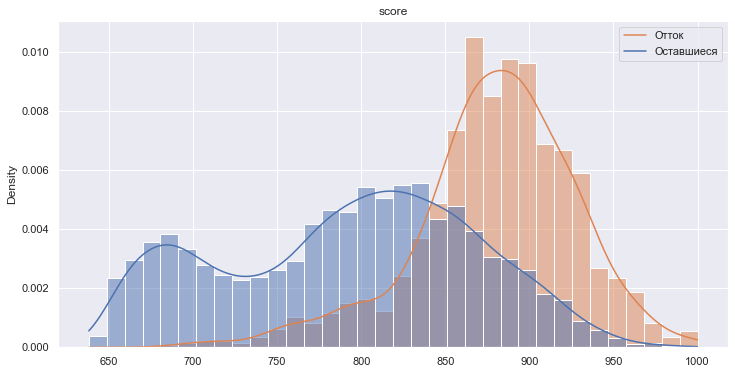

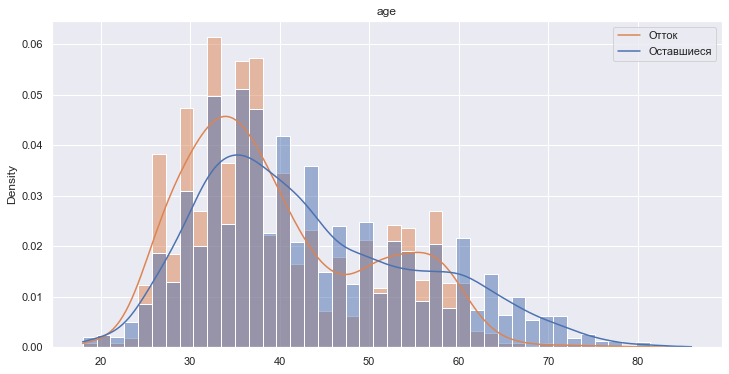

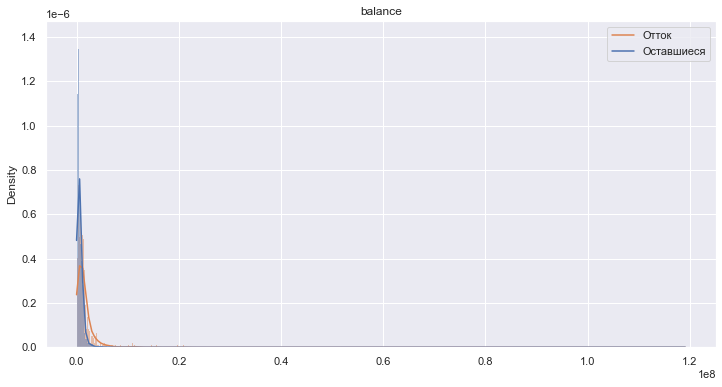

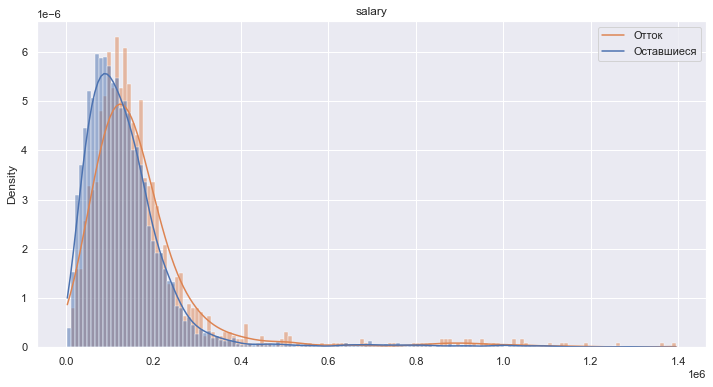

In [28]:
histplot_columns = ['score', 'age', 'balance', 'salary']
                    
for column in histplot_columns: 
    plt.figure(figsize=(12,6))
    sns.histplot(data = df, x = df[column], hue = 'churn', kde = True, stat="density", common_norm=False) #stacked=False
    plt.title(column)
    plt.xlabel('')
    plt.legend(['Отток', 'Оставшиеся'])
    plt.show()

Комментарий

По распределениям количественных признаков

 - банковский скоринг заметно выше у оттекших клиентов 850-950 основные значения. У оставшихся выделяется две группы 800-830 и 670-700
 - распределение по возрасту, примерно одинаковое, но среди оставшихся клиентов больше тех, кому за 60 и выделяется группа 32-42. У отточных выделяются группы 28-38  и 53-58
 - баланс на карте у отточных клиентов больше в два раза 
 - у отточных клиентов зарплата выше. Когда зарплата клиента начинает превышать 200 тыс вероятность оттока возрастает.Клиенты с очень высокими зарплатами, как правило уходят.

 - *Построим для столбцов salary и balance  графики boxplot*

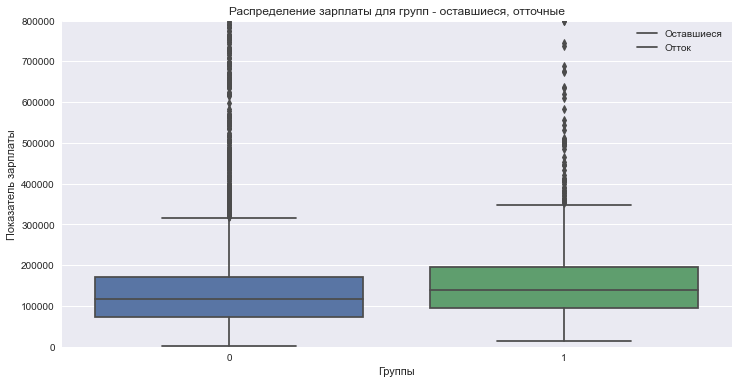

In [29]:
plt.figure(figsize=(12, 6))
with plt.style.context('seaborn'):
    sns.boxplot(x = 'churn', y='salary', data=df)
    plt.ylim(0.0, 800000)
    plt.title('Распределение зарплаты для групп - оставшиеся, отточные')
    plt.xlabel('Группы')
    plt.ylabel('Показатель зарплаты')
    plt.legend(['Оставшиеся', 'Отток'])
    #plt.xticks(rotation=45)

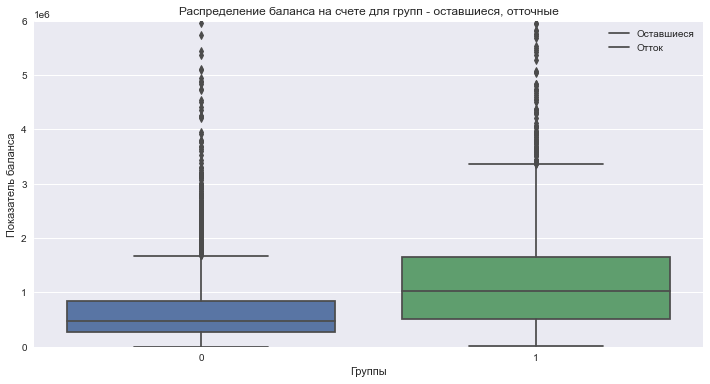

In [30]:
plt.figure(figsize=(12, 6))
with plt.style.context('seaborn'):
    sns.boxplot(x = 'churn', y='balance', data=df)
    plt.ylim(0.0, 6000000)
    plt.title('Распределение баланса на счете для групп - оставшиеся, отточные')
    plt.xlabel('Группы')
    plt.ylabel('Показатель баланса')
    plt.legend(['Оставшиеся', 'Отток'])

Комментарий

 - более четкая картина - средняя зарплата в группах не сильно различается, у отточных она больше.
 - сумма денежных средств у оттекших клиентов более, чем в 2 раза больше.
 - на графике видим, что в значениях присутствуют выбросы.

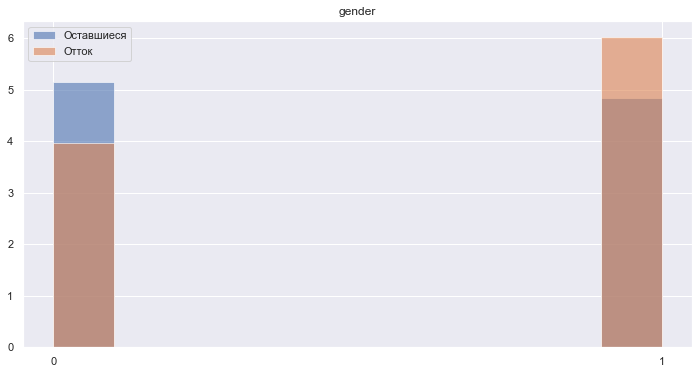

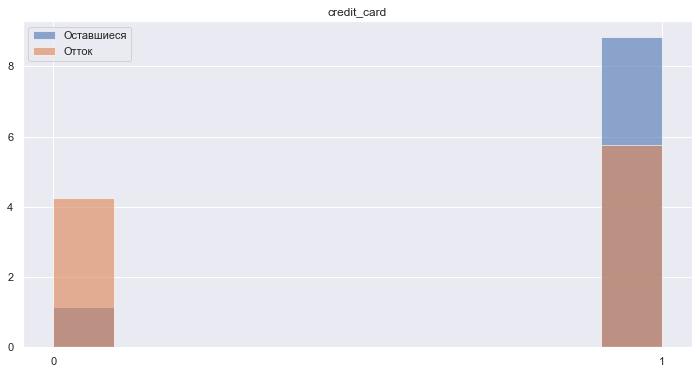

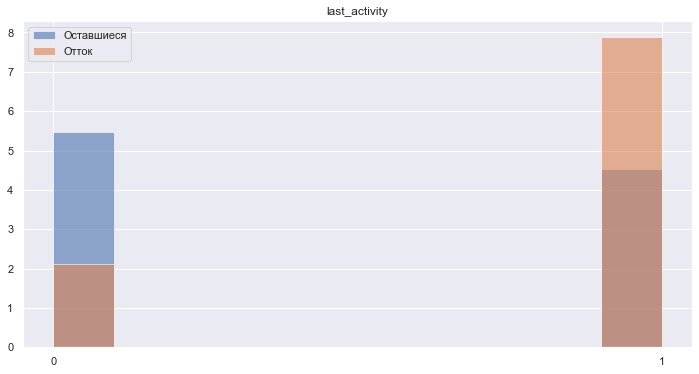

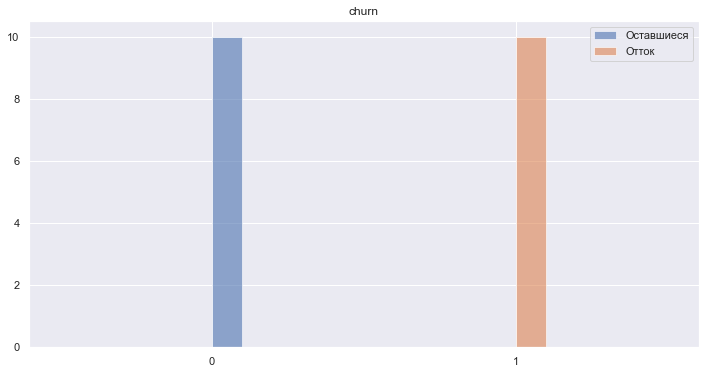

In [31]:
bin_columns = ['gender', 'credit_card', 'last_activity', 'churn']
for column in bin_columns:
    plt.figure(figsize=(12, 6))
    df.groupby('churn')[column].hist(density=True, alpha=0.6)
    plt.xticks([0,1])
    plt.title(column)
    plt.legend(['Оставшиеся', 'Отток'])
    plt.show()

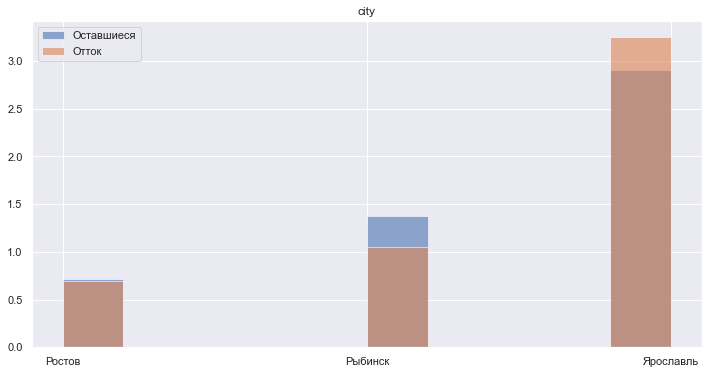

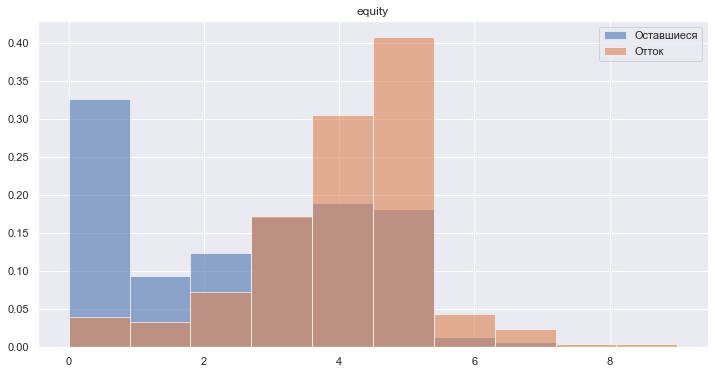

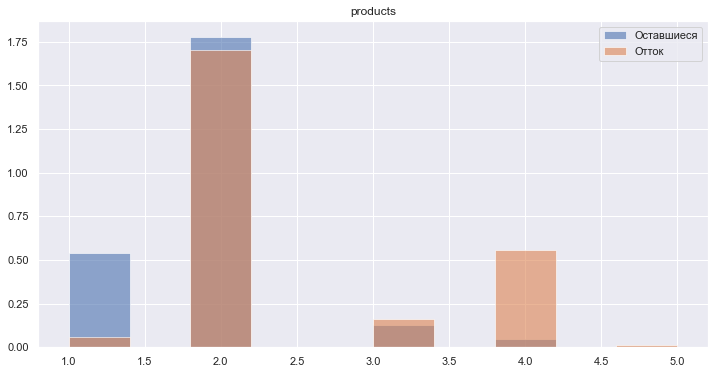

In [32]:
mylt_columns = ['city', 'equity', 'products']
for column in mylt_columns:
        plt.figure(figsize=(12, 6))
        df.groupby('churn')[column].hist(density=True, alpha=0.6)
        plt.title(column)
        plt.legend(['Оставшиеся', 'Отток'])
        plt.show()

In [33]:
city_churn = df.pivot_table(index='city', columns='churn', values='products', aggfunc ='count')
city_churn['Всего'] = city_churn[0] + city_churn[1]
city_churn['% оттока'] = round((city_churn[1] / (city_churn[0] + city_churn[1]))* 100, 2)
city_churn = city_churn.rename(columns={0 : 'Оставшиеся', 1 : 'Отток'}).sort_values(by= 'Оставшиеся', ascending=False)
city_churn

churn,Оставшиеся,Отток,Всего,% оттока
city,,,,
Ярославль,5016,890,5906,15.07
Рыбинск,2375,288,2663,10.81
Ростов,1242,189,1431,13.21


Комментарий

 - В каждом из трех городов присутствует доля отточных клиентов. В Ростове, примерно одинаковое количество в обеих группах.В Рыбинске больше оставшихся, в Ярославле - отточных
 - среди клиентов банка мужчин больше, и они быстрее попадают в отток
 - чаще попадают в отток клиенты, у которых от 4 и более объектов собственности. Среди клиентов, у которых   0 или 2 объекта - оставшихся больше. Если к клиента 3 объекта - вероятность уйти или остаться одинаковая
 - высокая доля оттока у клиентов, использующих  4 банковских продукта. А остаются клиенты с 1 продуктом (возможно это держатели кредитных карт). Чаще всего клиенты пользуются 2 продуктами в обеих круппах
 - держатели кредитных карт мало попадают в отток
 - активность (или лояльность) выше для клиентов ушедших в отток

 - *Построим матрицу корреляций и heatmap по ней. Изучим взаимосвязь признаков. Построим heatmap отражающий связь целевой переменной с признаками*
 

In [34]:
df_copy = df.copy()

Закодируем столбец city

In [35]:
df_copy = pd.get_dummies(df_copy, columns = ["city"])
df_copy.head()

,score,gender,age,equity,balance,products,credit_card,last_activity,salary,churn,city_Ростов,city_Рыбинск,city_Ярославль
0,838.0,0,32,1,377652.29,2,0,1,105665.06,1,1,0,0
1,845.0,0,31,3,214980.98,5,0,1,62058.62,0,1,0,0
2,869.0,0,30,4,467040.46,2,1,1,156945.23,1,1,0,0
3,856.0,0,25,4,475727.88,4,0,1,19502.68,0,0,1,0
4,873.0,0,37,3,1350858.40,4,0,1,119804.41,0,0,1,0


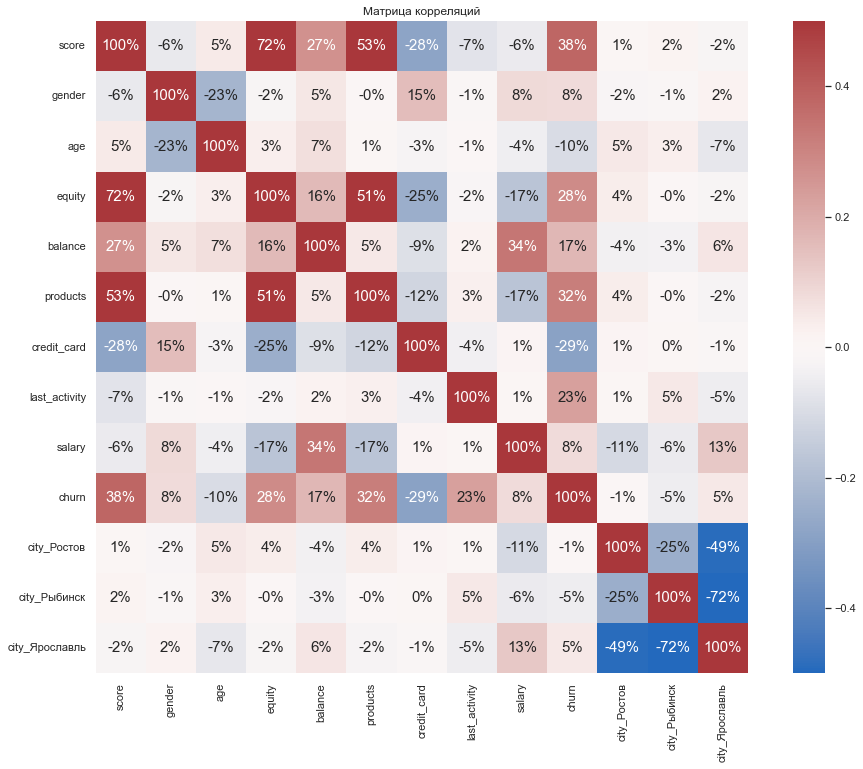

In [36]:
plt.figure(figsize=(16,12))
sns.heatmap(data = df_copy.corr(), annot=True, square=True, cmap='vlag', vmax=-0.5, vmin=0.5, fmt=".0%", annot_kws = {'size':15})
plt.title('Матрица корреляций')
plt.show()

Коментарий

 - выделяются два признака, коррелирующих сильнее других. Чтобы модели ML предсказывали точнее один из пары признаков удаляют и проверяют оработу модели, улучшилась ли она? Мы удалили столбец equity. Оценки модели не изменились или снизились на 1-2 балла. Улучшилась только на 1 балл две оценки модели GradientBoostingClassifier. Поэтому столбец вернули на место

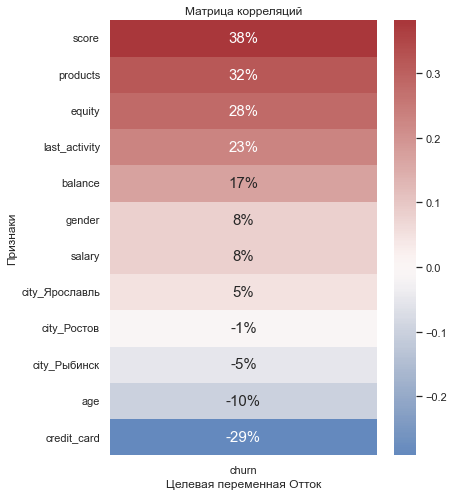

In [37]:
np.triu(df_copy.corr())       #square=True
plt.figure(figsize=(6,8))
sns.heatmap(data = df_copy.corr()[['churn']].drop('churn').sort_values('churn', ascending=False), annot=True, \
            cmap='vlag', center=0, fmt=".0%", annot_kws = {'size':15}) 
plt.title('Матрица корреляций')
plt.xlabel('Целевая переменная Отток')
plt.ylabel('Признаки')
plt.show()

Комментарий

Сильнее всего с целевой переменной коррелируют 
 - оценка скоринга
 - количество продуктов банка, которыми пользуется клиент
 - количество ценных объектов в собственности
 - активность
 - баланс по карте
 - заметная отрицательная корреляция с признаком кредитная карта
 - с городами корреляция оттока, можно сказать отсутствует, если смотреть на матрицу
 
Данные цифры перекликаются с информацией, полученной из графиков
 

- На графике boxplot заметили, что в значениях по столбцам balance и salary присутствуют выбросы. Изучим их более подробно.

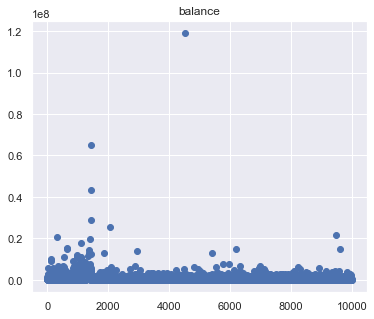

In [38]:
sns.set(rc = {'figure.figsize':(6, 5)})
x_values = pd.Series(range(0,len(df['balance'])))
plt.scatter(x_values, df['balance'])
plt.title('balance');

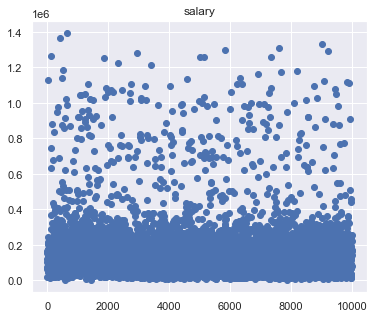

In [39]:
x_values = pd.Series(range(0,len(df['salary'])))
plt.scatter(x_values, df['salary'])
plt.title('salary');

На графиках мы сразу видим выбросы в значениях. Посчитаем выборочные перцентили

Отфильтруем датасет

In [40]:
print(np.percentile(df_with_userid['balance'], [95, 99]))
print(np.percentile(df_with_userid['salary'], [95, 99]))

[nan nan]
[316885.3445 887903.8546]


In [41]:
df['balance'].quantile([.95, .99]) # выберем другой способ определения перцентиля

0.95    2116704.784
0.99    4827443.494
Name: balance, dtype: float64

In [42]:
usersWithBigbalance = df_with_userid[df_with_userid['balance'] > df['balance'].quantile(.99)]['userid']
usersWithBigsalary = df_with_userid[df_with_userid['salary'] > np.percentile(df_with_userid['salary'], 99)]['userid']

filtred = (pd.concat([usersWithBigbalance, usersWithBigsalary], axis=0).drop_duplicates())

df_with_userid = df_with_userid[np.logical_not(df_with_userid['userid'].isin(filtred))]
print(df_with_userid.shape)
print('Потери составили: {:.0%}'.format(1- df_with_userid.shape[0]/ df.shape[0]))

(9843, 12)
Потери составили: 2%


In [43]:
df = df_with_userid.drop('userid', axis=1) # перезапишем переменную

Комментарий

- Таким образом, мы удалили по одному перцентилю из столбцов balance и salary. Потери в данных составили 2%

## Построение модели прогнозирования оттока клиентов

 - *Построим модели прогнозирования. Изучим признаки, которые модели ML определяют, как важные. Учтем их при формировании портрета клиента, склонного к оттоку*

In [44]:
# сохраним датафрейм с учётом преобразования признаков

dff = pd.get_dummies(df)
dff = dff.drop('balance', axis=1)


In [45]:
# определим функцию, которая будет выводить  метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))
    
# разделим данные на признаки (матрица X) и целевую переменную (y)
X = dff.drop('churn', axis=1)
y = dff['churn'] 
#class_weight = balanced 

# разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) #stratify=y
print(X_train.shape)
print(X_test.shape)

(7874, 11)
(1969, 11)


In [46]:
# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [47]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0, penalty='none',  class_weight ='balanced')
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:')
print()
feature_weights = lr_model.coef_
#print('Коэффициенты модели логистической регрессии, указывающие на важность признаков: \n\n',  feature_weights)
df_lr = pd.DataFrame(data = feature_weights, columns = X_train.columns)
print('Важность признаков для модели логистической регрессии:\n', df_lr.T.reset_index()\
                       .rename(columns={'index' : 'feature', 0 : 'importance'}).sort_values(by= 'importance', ascending=False))


Метрики для модели логистической регрессии:
	Accuracy: 0.88
	Precision: 0.52
	Recall: 0.90
	ROC_AUC: 0.92

Важность признаков для модели логистической регрессии:
            feature  importance
0            score    1.529695
6    last_activity    1.055780
4         products    0.878963
1           gender    0.429832
10  city_Ярославль    0.146929
7           salary    0.110935
8      city_Ростов    0.075988
3           equity   -0.066197
9     city_Рыбинск   -0.224464
2              age   -0.286094
5      credit_card   -0.553669


In [48]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса:')
print()
df_rf = pd.DataFrame({'feature': X_train.columns, 'importance': rf_model.feature_importances_})
print('Важность признаков для модели случайного леса:\n', df_rf.sort_values(by= 'importance', ascending=False))

Метрики для модели случайного леса:
	Accuracy: 0.96
	Precision: 0.92
	Recall: 0.80
	ROC_AUC: 0.98

Важность признаков для модели случайного леса:
            feature  importance
0            score    0.264257
6    last_activity    0.138205
4         products    0.133402
7           salary    0.121900
2              age    0.110994
5      credit_card    0.082505
3           equity    0.058807
1           gender    0.043494
9     city_Рыбинск    0.022266
10  city_Ярославль    0.016235
8      city_Ростов    0.007936


In [49]:
# зададим алгоритм для новой модели на основе алгоритма решающего дерева
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train_st, y_train)
tree_predictions = tree_model.predict(X_test_st)
tree_probabilities = tree_model.predict_proba(X_test_st)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    tree_predictions,
    tree_probabilities,
    title='Метрики для модели дерева решений:')
print()
df_tree = pd.DataFrame({'feature': X_train.columns, 'importance': tree_model.feature_importances_})
print('Важность признаков для модели решающего дерева:\n', df_tree.sort_values(by= 'importance', ascending=False))

Метрики для модели дерева решений:
	Accuracy: 0.95
	Precision: 0.80
	Recall: 0.80
	ROC_AUC: 0.88

Важность признаков для модели решающего дерева:
            feature  importance
0            score    0.234517
6    last_activity    0.176744
4         products    0.125054
2              age    0.122235
7           salary    0.120169
5      credit_card    0.072588
1           gender    0.068927
9     city_Рыбинск    0.044233
3           equity    0.028469
8      city_Ростов    0.003652
10  city_Ярославль    0.003413


In [50]:
# сделаем все то же самое для алгоритма градиентного бустинга
gb_model = GradientBoostingClassifier(n_estimators = 100, random_state = 0)
gb_model.fit(X_train_st, y_train)
gb_predictions = gb_model.predict(X_test_st)
gb_probabilities = gb_model.predict_proba(X_test_st)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    gb_predictions,
    gb_probabilities,
    title='Метрики для модели градиентного бустинга:')
print()
df_gb = pd.DataFrame({'feature': X_train.columns, 'importance': gb_model.feature_importances_})
print('Важность признаков для модели градиентного бустинга:\n', df_gb.sort_values(by= 'importance', ascending=False))

Метрики для модели градиентного бустинга:
	Accuracy: 0.96
	Precision: 0.90
	Recall: 0.79
	ROC_AUC: 0.98

Важность признаков для модели градиентного бустинга:
            feature  importance
0            score    0.278336
6    last_activity    0.239019
4         products    0.236017
2              age    0.069686
5      credit_card    0.061315
7           salary    0.052300
1           gender    0.043332
9     city_Рыбинск    0.018355
10  city_Ярославль    0.001235
3           equity    0.000250
8      city_Ростов    0.000157


Переобучаем модель на неотмасштабированных данных

In [51]:
# зададим алгоритм для новой модели на основе алгоритма решающего дерева
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
tree_probabilities = tree_model.predict_proba(X_test)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    tree_predictions,
    tree_probabilities,
    title='Метрики для модели дерева решений:')

Метрики для модели дерева решений:
	Accuracy: 0.95
	Precision: 0.80
	Recall: 0.80
	ROC_AUC: 0.88


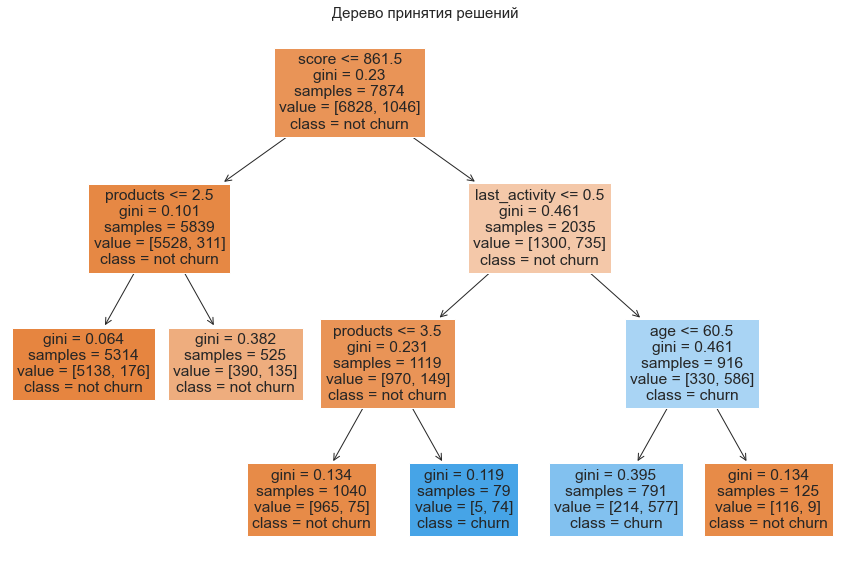

In [52]:
model_tree = tree.DecisionTreeClassifier(max_leaf_nodes=6, random_state=0)
model_tree.fit(X_train, y_train)

plt.figure(figsize = (15,10)) 
tree.plot_tree(model_tree, filled=True, feature_names = X_train.columns, class_names = ['not churn', 'churn'])
plt.title('Дерево принятия решений', fontsize = 15, loc='center')
plt.show()

Комментарий

Наиболее значимые признаки для оценивания оттечет клиент или нет
 - все модели на 1 место поставили - кредитный скоринг
 
 - по решению лучшей модели RandomForestClassifier 2 и 3 место по важности делят признаки last_activity и products  соответственно
   - признаки зарплата, возраст и кредитная карта делят следующие три места соответственно
   
 - остальные модели также выделили именно эти признаки, только в другой приоритетности. 
 - модель LogisticRegression  - пол, город Ярославль и зарплату поставила на 4, 5 и 6 место соответственно

## Проверка гипотез

Проверим гипотезы
 - различия дохода между теми клиентами, которые ушли и теми, которые остались
 - различие долей ушедших клиентов в двух возрастных группах
 - различие долей ушедших клиентов среди лояльных и нелояльных
 
На графиках мы видели, что группы клиентов имеют небольшое различие в возрасте и размере зарплаты. Проверим, является ли это различие статистически значимым.

In [53]:
salary_churn = df.query('churn == 1')['salary']
salary_not_churn = df.query('churn == 0')['salary']
print(salary_churn.shape)
print(salary_not_churn.shape)

(1307,)
(8536,)


**Сформулируем гипотезы:**
 - Нулевая гипотеза - средняя заработная плата для клиентов, которые ушли и, которые остались равна
 - Альтернативная гипотеза - средняя зарплата в группах отличается
 
Наш выборки очень отличаются по размеру

Проверим методом st.shapiro(x), можно ли считать наши данные нормально распределёнными:

In [54]:
alpha = 0.01  # критический уровень статистической значимости

results = st.shapiro(salary_churn)
p_value = results[1]
print('p-значение: ', p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')
    
results = st.shapiro(salary_not_churn)
p_value = results[1]
print('p-значение: ', p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')


p-значение:  1.0953682167360716e-37
Отвергаем нулевую гипотезу: распределение не нормально
p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Комментарий

Если известно, что распределение изучаемого количественного признака в генеральной совокупности
отличается от нормального, то тогда необходимо применять непараметрические
критерии, которые не предполагают подчинения данных какому-либо закону распределения, в том числе
и нормальному.

Так как выборки большие, то нам неважно, что они распределены ненормально, мы можем использовать t-критерий. Благодаря ЦПТ, если размер выборки составляет хотя бы несколько десятков значений, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности. Это утверждение верно, даже если сама генеральная совокупность не распределена нормально.

При разном размере выборок, мы ставим equal_var в положение False.  В среднем у u-критерия Манна-Уитни мощность выше, чем у t-критерия, т.е. он чаще даёт более точный результат.

Выберем тест, основанный на структурном подходе, или непараметрический -  критерий Манна-Уитни.

Главное отличие непараметрических методов в том, что они работают с рангами, — номерами значений в упорядоченном ряду, — никак не учитывая сами значения. Поэтому к ним прибегают тогда, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты.

In [55]:
df['salary'].value_counts()

108250.17    2
176348.18    2
49742.87     2
180711.97    1
167433.78    1
            ..
183843.32    1
30843.41     1
70858.40     1
117338.35    1
255439.00    1
Name: salary, Length: 9840, dtype: int64

In [56]:
df['age'].value_counts()

33    411
36    410
37    396
34    392
32    375
     ... 
83      3
86      2
79      2
84      2
82      2
Name: age, Length: 68, dtype: int64

In [57]:
alpha = 0.01  # критический уровень статистической значимости

results = st.mannwhitneyu(salary_churn, salary_not_churn, alternative='two-sided')

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  3.394583009054882e-21
Отвергаем нулевую гипотезу: разница статистически значима


На основе анализа графиков выделили 2 группы клиентов, в которых отток наиболее выражен: 28-38 и 53-58

Сформируем эти группы

**Сформулируем гипотезы:**

 - Нулевая гипотеза - доли ушедших клиентов в группах одинаковая
 - Альтернативная гипотеза - доли ушедших клиентов в группах различаются
 
Проверим наши выборки на нормальность  распределения

In [58]:
age_labels = ['young', 'grown', 'seriously'] # создадим сегменты 
age_bins = [28, 38, 53, 58]
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

In [59]:
age_young = df.query('age_group == "young"')['churn']  # сформируем выборку
age_seriosly = df.query('age_group == "seriously"')['churn']
print(age_young.shape)
print(age_seriosly.shape)

(3524,)
(765,)


In [60]:
alpha = 0.01  # критический уровень статистической значимости

results = st.shapiro(age_young)
p_value = results[1]
print('p-значение: ', p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')
    
results = st.shapiro(age_seriosly)
p_value = results[1]
print('p-значение: ', p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально
p-значение:  2.0739217272007293e-43
Отвергаем нулевую гипотезу: распределение не нормально


In [61]:
pivot_age = df.pivot_table(index='churn', columns='age_group', values='products', aggfunc='count').reset_index()
pivot_age

age_group,churn,young,grown,seriously
0,0,2945,3021,642
1,1,579,372,123


In [62]:
print('Всего клиентов в сегменте young: ', df[df['age_group']=='young']['products'].count())
print('Всего клиентов в сегменте seriously: ', df[df['age_group']=='seriously']['products'].count())             

Всего клиентов в сегменте young:  3524
Всего клиентов в сегменте seriously:  765


In [63]:
alpha = .01 
count = np.array([579, 123])
nobs = np.array([3524, 765])
stat, pval = proportions_ztest(count, nobs)

print('p-значение: ', pval)
if (pval < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")


p-значение:  0.8115987027303484
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



 

Сравним доли ушедших клиентов среди нелояльных и лояльных клиентов.

При оценке среднего значения генеральной совокупности выборочные средние нормально распределены вокруг среднего всей совокупности независимо от того, как распределена сама генеральная совокупность. И так как наша выборка  не имеет нормального, распределения - сравним доли.

**Сформулируем гипотезы:**
 - Нулевая гипотеза - доли ушедших клиентов среди лояльных и нелояльных равные
 - Альтернативная гипотеза - между долями есть значимая разница

In [64]:
churn_last_activity = df.query('last_activity == 1')['churn']
churn_not_last_activity = df.query('last_activity == 0')['churn']
print(churn_last_activity.shape)
print(churn_not_last_activity.shape)

(4915,)
(4928,)


In [65]:
df_pivot = df.pivot_table(index='churn', columns='last_activity', values='products', aggfunc='count').reset_index()
df_pivot = df_pivot.drop(index=[0])
df_pivot

last_activity,churn,0,1
1,1,277,1030


In [66]:
n_users = { 
           0: df[df['last_activity']==0]['products'].count(),
           1: df[df['last_activity']==1]['products'].count(),
           }
n_users

{0: 4928, 1: 4915}

In [67]:
def z_value_diff(first_group, second_group, alpha):
    for i in df_pivot.index:
        alpha = alpha
        # пропорция успехов в первой группе
        p1 = df_pivot[first_group][i] / n_users[first_group]
        # пропорция успехов во второй группе
        p2 = df_pivot[second_group][i] / n_users[second_group]
        # пропорция успехов в комбинированном датасете
        p_combined = ((df_pivot[first_group][i] + df_pivot[second_group][i]) / 
                      (n_users[first_group] + n_users[second_group]))
        # разница пропорций в датасетах
        difference = p1 - p2
        # считаем статистику в ст.отклонениях стандартного нормального распределения
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * 
                                        (1/n_users[first_group] + 1/n_users[second_group]))
        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = st.norm(0, 1) 
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print('{} p-значение: {}'.format(df_pivot['churn'][i], p_value))
        if (p_value < alpha):
            print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
        else:
            print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")
        print('')

In [68]:
z_value_diff(0,1,0.01)

1 p-значение: 0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница



Комментарий

Мы проверили и установили:
 - между доходами в группах есть значимая разница
 - доли ушедших клиентов в двух выделенных нами высокоотточных возрастных группах не отличаются
 - доли ушедших клиентов среди активных и неактивных разные

## Сегментация клиентов

**При формировании портрета клиента более всего склонного к оттоку  учтем:**
 
 - 1.оценку скоринга. Она на первом иесте как показатель оттока и у моделей и матрицы корреляций. Выше 850 и клиент вероятнее уйдет
 - 2.количество продуктов банка, которыми пользуется клиент -  на втором месте по значимости. Высокая доля оттока у клиентов, использующих  4 банковских продукта
 - 3.активность клиента (2 или 3) место по значимости. В отток попадают активные клиенты.(Стат тест также подтвердил разницу)
 
Далее пречислим менее весомые признаки для оттока и охарактеризуем, опираясь на анализ графиков

 - 4.отсутствие кредитной карты - повышает вероятность оттока (отрицательная корреляция с оттоком по матрице, У моделей 4-5 место)
 - 5.чаще попадают в отток клиенты, у которых от 4 и более объектов собственности.
 - 6.выделяются две возрастные группы с высоким оттоком 28-38  и 53-58 - Стат тест не выявил разницу между долями оттока в этих группах (выделим их в категории)
 - баланс на счете и зарплата - более высокие у отточных клиентов. 
     - 7.Когда зарплата клиента начинает превышать 2 млн вероятность оттока возрастает.Клиенты с очень высокими зарплатами, как правило уходят.
     - 8.Баланс на карте у отточных клиентов больше в два раза. Если баланс становится выше 2 млн, клиент попадает в отток

 - *Попробуем выделить группы клиентов по оттоку.* 
 
Используем приоритетность признаков установленных по ML и выявленных на heatmap, а также графиков

In [69]:
high_churn_1 = df.query('score > 850 and credit_card == 0') 
print(len(high_churn_1))
print(high_churn_1['churn'].mean())

874
0.545766590389016


In [70]:
high_churn_2 = df.query('last_activity == 1 and score > 850')  
print(len(high_churn_2))
print(high_churn_2['churn'].mean())

1378
0.5965166908563135


In [71]:
high_churn_3 = df.query('(score > 850 and equity >=4) or balance > 2000000')
                        
print(len(high_churn_3))
print(high_churn_3['churn'].mean())

2225
0.371685393258427


In [72]:
high_churn_4 = df.query('(age_group in ["young", "seriously"] or salary > 200000) or score > 850') 
print(len(high_churn_4))
print(high_churn_4['churn'].mean())

6662
0.17607325127589313


Комментарий

Выделили группы клиентов по признакм

Напишем функцию и создаим столбец с группами

In [73]:
def segments(row):
    if row['score'] > 850 and row['credit_card']==0:  
        return 'group_1'
    elif row['last_activity'] == 1 and row['score'] > 850:
        return 'group_2'
    elif (row['score'] > 850 and row['equity'] >= 4) or row['balance'] > 2000000:
        return 'group_3'
    elif (row['age_group'] in ['young', 'seriously'] or row['salary'] > 200000) or row['score'] > 850:
        return 'group_4'
    else:
        return 'group_0'

In [74]:
df['categories'] = df.apply(segments, axis=1)


In [75]:
df['categories'].value_counts()

group_4    4004
group_0    3176
group_2     912
group_3     877
group_1     874
Name: categories, dtype: int64

Посмотрим средние значения и показатель mode()

In [76]:
df.groupby('categories').mean().T.round(2)

categories,group_0,group_1,group_2,group_3,group_4
score,773.25,891.27,887.73,892.25,770.20
gender,0.46,0.40,0.46,0.53,0.55
age,46.61,43.41,43.11,43.54,39.49
equity,2.22,4.19,4.10,4.62,1.84
balance,501136.14,1279541.74,962033.41,1086077.05,504308.47
products,1.91,2.14,2.45,2.23,1.81
credit_card,0.90,0.00,1.00,1.00,0.92
last_activity,0.53,0.53,1.00,0.01,0.46
salary,102833.17,152279.71,135195.14,134422.90,161633.61
churn,0.04,0.55,0.49,0.10,0.04


In [77]:
for value in ['group_0', 'group_1', 'group_2', 'group_3', 'group_4']:
    dmf = df[df['categories'] == value]
    print('equity для сегмента:',  value)
    print(dmf.query('churn == 1')['equity'].mode())
    print()

equity для сегмента: group_0
0    4
dtype: int64

equity для сегмента: group_1
0    5
dtype: int64

equity для сегмента: group_2
0    5
dtype: int64

equity для сегмента: group_3
0    5
dtype: int64

equity для сегмента: group_4
0    3
dtype: int64



Комментарий

Выделились  группы с большим показателем оттока и количеством клиентов. Но когда мы поместили их функцию, видимо происходит наслоение информации. Устойчиво мы смогли выделить 2 группы с высоким показателем оттока

 -  группа 1 - показатель оттока 55% - численность 874
    - высокий кредитный рейтинг
    - отсутсвие кредитной карты
    - самый большой баланс на счете 
    - в 50% случаев клиент активный
    - объектов в собственности - 5 
    - средний возраст 43 года
 -  группа 2 - показатель оттока 49% - численность 912
    - высокий кредитный ретинг
    - количество объектов в собственности 5
    - клиент активный
    - есть кредитная карта
    - средний возраст 43 года
 - группа 3 - показатель оттока 10% - численность 877
    - высокая оценка кредитного скоринга
    - клиент не активный
    - значительное количество денежных средств на балансе
    - количество объектов в собственности чаще 5 
    - владеет кредитной картой
    - средний возраст 44 года
     
Также у нас выделились 2 группы с низки уровнем оттока

 - группа 0 - показатель оттока  4% численность 3176
    - более низкий кредитный рейтинг по сравнению с предыдущими группами
    - средний возраст 47 лет
    - самый низкий баланс на счете и самая низкая зарплата в группе
    - владеют кредитной картой в 90% случаев
 - группа 4 - показатель оттока 4% численность 4004
    - низкий кредитный рейтинг
    - средний возраст 40 лет
    - баланс по карте низкий
    - зарплата высокая
    - в 90% владеют кредитной картой



Построим распределение признаков для выделенных групп по отточным клиентам

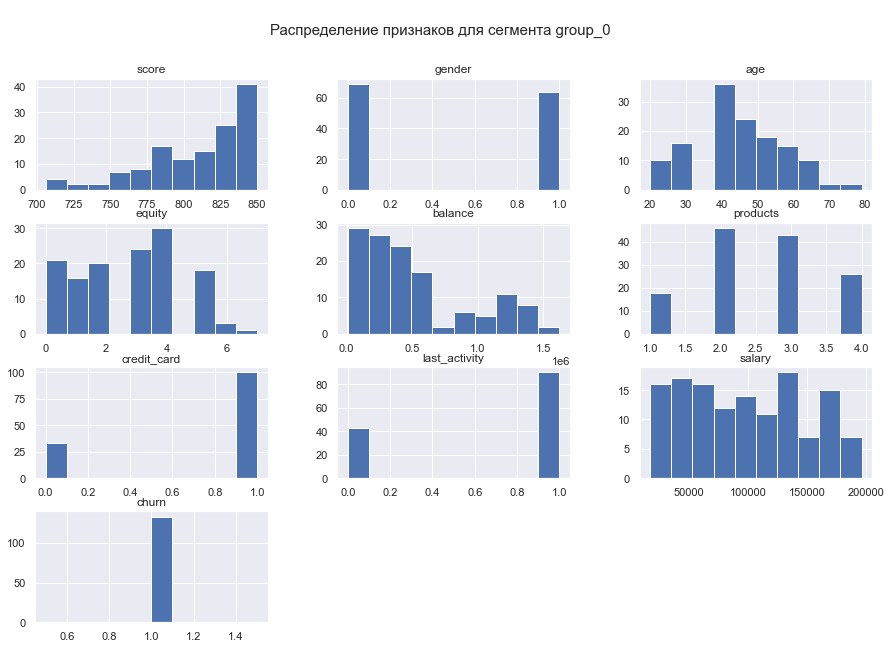

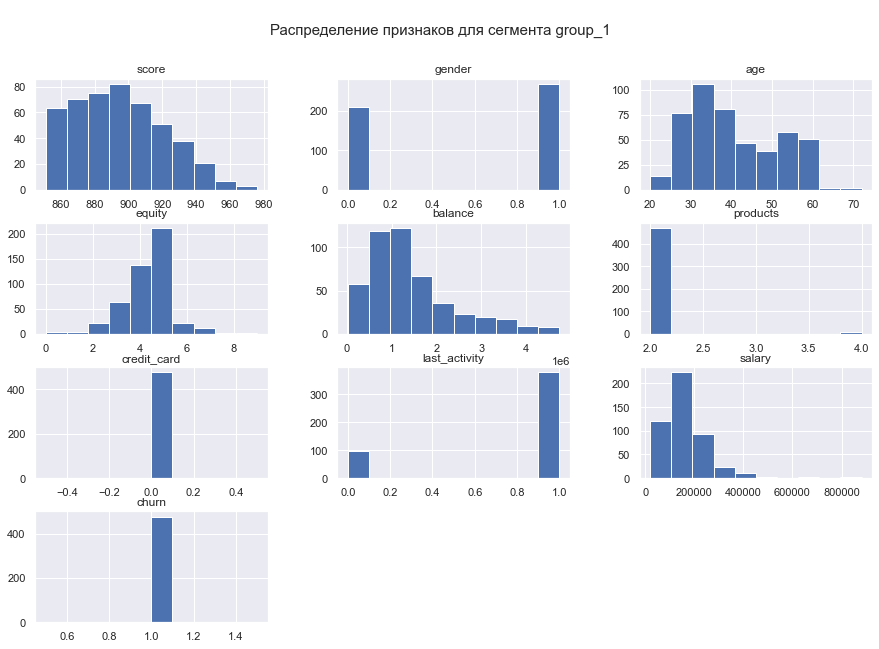

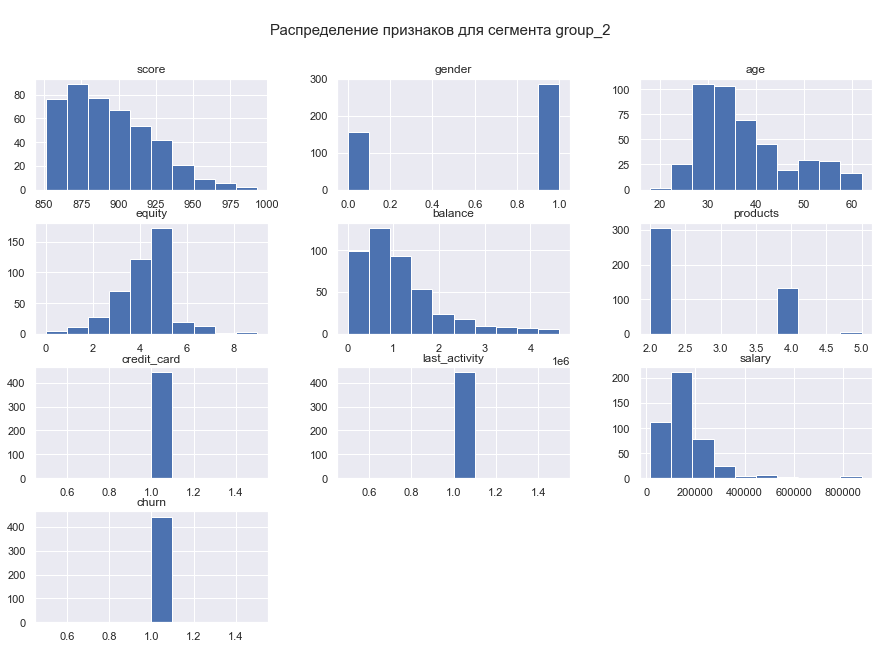

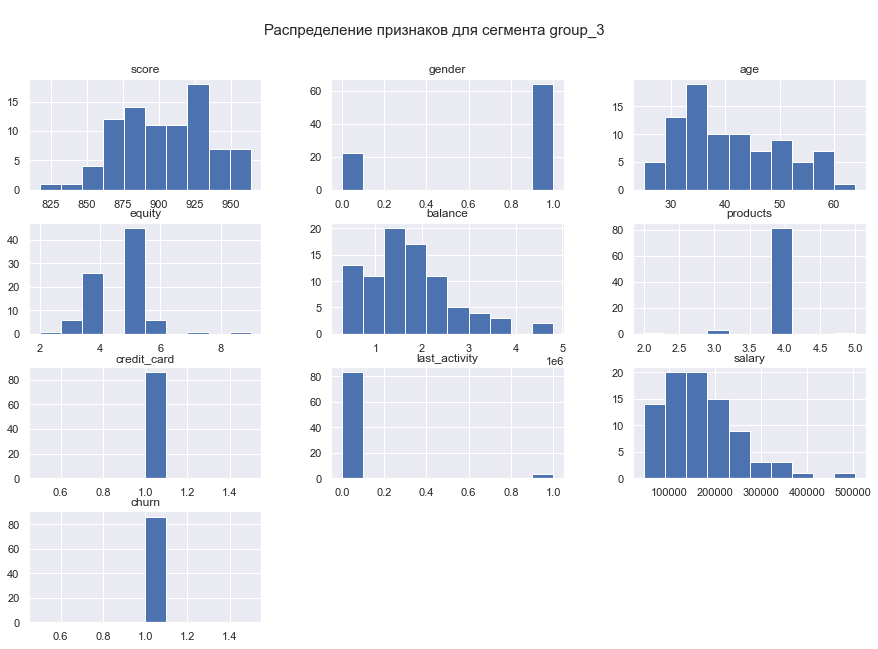

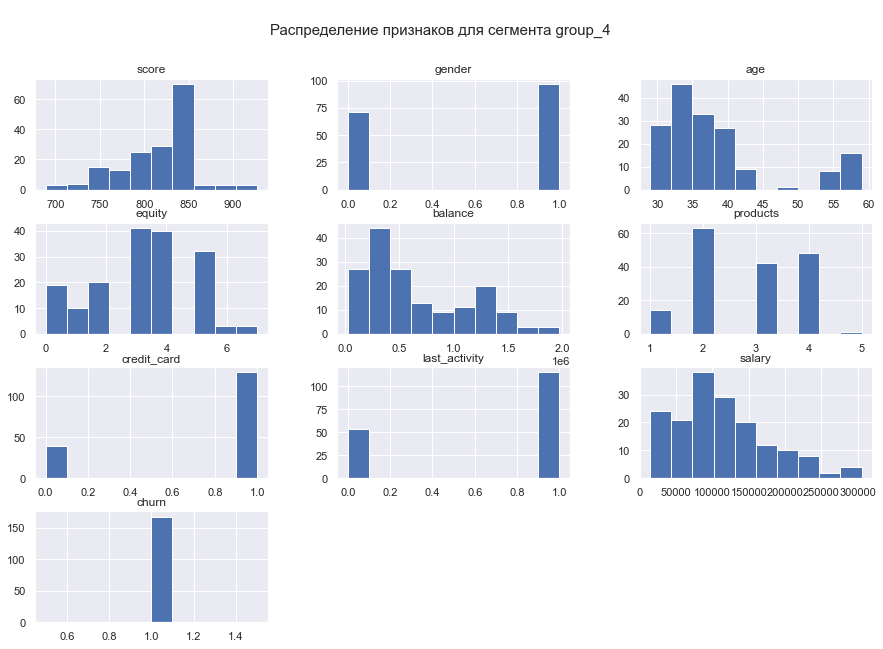

In [78]:
for value in ['group_0', 'group_1', 'group_2', 'group_3', 'group_4']:
    dmf = df[df['categories']==value]
    dmf.query('churn == 1').hist(figsize=(15, 10))    
    plt.suptitle('\nРаспределение признаков для сегмента {}'.format(value), fontsize = 15)
    plt.show()

Комментарий:

Для сегментов с высоким  оттоком в распределениях признаков заметно следующее:

 - стабильно высокие оценки кредитного скоринга
 - в 1, 2, а также 3 сегменте мужчин заметно больше
 - наиболее частое значение возраста 30-40 лет
 - количество объектов в собственности от 4 и более. Редко встречаются клиенты с нулем объектов
 - как правило используют больше 2 банковских продуктов. Но чаще 2 продукта
 - кредитными картами пользуются во 2 и 3 группе В 1 группе с самым большим показателем оттока нет держателей кредитных карт
 - преобладающее большинство клиентов - активные
 - средняя зарплата чаще 200000
 
Для сегментов с низкой долей оттока

-  сниженный кредитный рейтинг
- в группе 0 преобладают женщины 
- больше клиентов возраста 50+, - заметнее всего в 4 группе
- много клиентов с 0 объектов собственности, хотя владельцы большего количества объектов также присутствуют
- используют 1 продукт или 3
- преобладающее большинство клиентов - держататели кредитных карт
- в 3 группе показатель активности почти нулевой
- средняя зарплата чаще 50000 - 70000
 

## Вывод

Данное исследование проводилось для регионального банка. Необходимо смоделировать стратегию взаимодействия с клиентами на основе аналитических данных.
Задача данной работы заключалась в изучении портрета клиента банка, а также признаков наиболее сильно влияющих на отток.

Данные проедоставлены в csv-файле.

*Работа состояла из следующих этапов*
 
 - **Изучение данных из файла**
   - проанализировали корректность данных
   - заполнили пропуски
   
 - **Исследовательский анализ данных (EDA)**
   - изучили данные методом `describe()` и `mode()`
   - построили распределения признаков
   - установили, что
     - клиенты с более высоким кредитным рейтингом чаще уходят в отток (чья платежестособность выше!)
     - среди ушедших в отток мужчин больше
     - средний возраст оставшихся клиентов и ушедших в отток примерно одинаковый около 40, люди за 60 оттекают редко
     - для тех кто ушел среднее количество объектов в собственности 4, это в 2 раза больше, чем у оставшихся
     - 5 ценных объектов в собственности - самое частое явление
     - большинство оставшихся клиентов, как правило не владеют собственностью
     - среднее число денег на счете в три раза больше у оттекших клиентов
     - в среднем клиенты пользуются двумя продуктами банка - это характерно для обеих групп
     - почти 90% не попавших в отток владеют кредитными картами клиентов; для оттекших этот показатель около 60%
     - показатель лояльности почти 80% у ушедших клиентов, у оставшихся 45% 
     - средняя зарплата 175 тыс у клиентов попавших в отток, и это на 30 тыс больше, чем у оставшихся
    - построили матрицу корреляций и график `heatmap()`
    - обработали выбросы. Удалили по 1 перцентилю в столбцах с показателями зарплаты и баланса
    
  - **Построили модели прогнозирования**, чтобы изучить признаки, которые модели ML определяют, как важные. В дальнейшем  учтем их, а также показатели корреляции  при формировании портрета клиента, попадающего в отток
    - выяснили, что
      - все модели на 1 место поставили - кредитный скоринг
      - по решению  лучшей модели 2 и 3 место по важности делят признаки products и last_activity соответственно
      - признаки зарплата, возраст и кредитная карта делят следующие три места соответственно
      - остальные модели также выделили именно эти признаки, только в другой приоритетности.
      
  - **Провели статистические тесты** Проверили гипотезы о равенстве средней зарплаты, среднеговозраста в группах клиентов, а также сравнили доли ушедших клиентов среди лояльных и не лояльных. Получили следующие результаты
    - между доходами в группах есть значимая разница
    - средний возраст в группах отличается
    - доли ушедших клиентов среди лояльных и нелояльных разные
    
  - **На этапе сегментации** 
  
     Выделили черты для формирования портрета клиента, склонного к оттоку 
       - оценку скоринга, если выше 850 и клиент вероятнее уйдет
       - количество продуктов банка, которыми пользуется клиент. Высокая доля оттока у клиентов, использующих  4 банковских продукта
       - в отток чаще попадают активные клиенты
       - отсутствие кредитной карты - повышает вероятность оттока 
       - попадают в отток клиенты, у которых от 4 и более объектов собственности.
       - выделяются две возрастные группы с высоким оттоком 28-38  и 53-58 
       - зарплата - более высокая у отточных клиентов. Когда зарплата клиента начинает превышать 200 тыс вероятность оттока возрастает.
       - баланс на карте у отточных клиентов больше в два раза. Если баланс становится выше 2 млн, клиент попадает в отток
        
 На основе сгруппированных признаков постарались выделить группы клиентов, наиболее склонных к оттоку. 
    
 Добавили столбец с группами
    
Получилось выделить группы по следующим характеристикам
    
   - **высокий уровень оттока**
     - группа 1 - показатель оттока 55% - численность 874
        - высокий кредитный рейтинг
        - отсутсвие кредитной карты
        - самый большой баланс на счете 
        - в 50% случаев клиент активный
        - объектов в собственности - 5 
        - средний возраст 43 года
     - группа 2 - показатель оттока 49% - численность 912
        - высокий кредитный ретинг
        - количество объектов в собственности 5
        - клиент активный
        - есть кредитная карта
        - средний возраст 43 года
     - группа 3 - показатель оттока 10% - численность 877
       - высокая оценка кредитного скоринга
       - клиент не активный
       - значительное количество денежных средств на балансе
       - количество объектов в собственности чаще 5 
       - владеет кредитной картой
       - средний возраст 44 года
   - **низкий уровень оттока**
     - группа 0 - показатель оттока  4% численность 3176
       - более низкий кредитный рейтинг по сравнению с предыдущими группами
       - средний возраст 47 лет
       - самый низкий баланс на счете и самая низкая зарплата в группе
       - владеют кредитной картой в 90% случаев
     - группа 4 - показатель оттока 4% численность 4004
       - низкий кредитный рейтинг
       - средний возраст 40 лет
       - баланс по карте низкий
       - зарплата не самая низкая
       - в 90% владеют кредитной картой
      
**Рекомендации**

 - Следует разработать портфель инвестиционных проектов, чтобы заинтересовать и  удержать клиентов с большим балансом на счете
 - Клиентов более старшего возраста возможно заинтересуют программы пенсионного страхования(инвестирования), таких значительно больше среди оставшихся, необходимо удержать их, сделав взаимодействие с банком комфортным и полезным
 - Мы выяснили, что тенденцию к оттоку имеют клиенты у которых 3,4,5 ценностных объектов. Возможно, банк сможет предложить для них интересные условия для страхования дааных объектов.

 - Наличие кредитной карты банка сильный удержимвающий фактор. Наверно нужно не снижать темп работ в данном направлении 
 
 - Разработать продукты с учетом возраста. Если для более старшего возраста привлекательтны продукты сохранения и накопления. Клиентов среднего возраста возможно заинтересуют конвертация денежных средств с помощью новейших технологий, а также краткосрочные перспективные инвестиции 
 
 - Группа клиентов  с высокой зарплатой и с маленьким балансом на счете. Как правило - это держатели кредитных карт. Данные клиенты, активно тратят и охотно берут кредиты. Возможно предложить им более выгодные условия кредитования
 
 - Возможно, следует изучить опыт работы отделения Рыбинска. Процент оттока там заметно ниже. 